In [1]:
import numpy as np
import pandas as pd
import math
from pprint import pprint
import matplotlib.pyplot as plt 
from annfuncs import *

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("CCPP\Folds5x2_pp - Sheet1.csv") 
# df1=pd.read_csv("CCPP\Folds5x2_pp - Sheet2.csv") 
# df2=pd.read_csv("CCPP\Folds5x2_pp - Sheet3.csv") 
# df3=pd.read_csv("CCPP\Folds5x2_pp - Sheet4.csv") 
# df4=pd.read_csv("CCPP\Folds5x2_pp - Sheet5.csv") 

# df=df.append(df1,ignore_index=True)
# df=df.append(df2,ignore_index=True)
# df=df.append(df3,ignore_index=True)
# df=df.append(df4,ignore_index=True)

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
def normalise(df,func):
    maxes=[]
    mins=[]
    for c in df.columns:
        maxes.append(df[c].max())
        mins.append(df[c].min())
    count=0
    for c in df.columns:
        if(func=="tanh"):
            df[c]=(2*df[c]-(maxes[count]+mins[count]))/(maxes[count]-mins[count])
        elif(func=="sigmoid"):
            df[c]=(df[c]-(mins[count]))/(maxes[count]-mins[count])

        count=count+1
    print(mins)
    print(maxes)
    return maxes,mins
#     print(df)

def denormalise(y,func,maxes,mins):
    if(func=="tanh"):
        ynew=(y*(maxes-mins)+(maxes+mins))/2
    elif(func=="sigmoid"):
        ynew=y*(maxes-mins)+mins
    return ynew
    

In [5]:
activation='tanh'

og_y=df['PE']
maxes,mins=normalise(df,activation)
y=np.array(df['PE'].values)
df.drop(['PE'], axis=1,inplace=True)

x=np.array(df.values)

[1.81, 25.36, 992.89, 25.56, 420.26]
[37.11, 81.56, 1033.3, 100.16, 495.76]


In [6]:
df

,AT,V,AP,RH
0,-0.254958,-0.416370,0.543182,0.276408
1,0.324079,0.338078,0.343727,-0.101340
2,-0.813031,-0.500356,-0.046276,0.784987
3,0.079320,0.137367,-0.141302,0.369437
4,-0.489518,-0.567972,-0.191289,0.905094
...,...,...,...,...
9563,-0.159207,-0.134164,0.045286,0.754424
9564,-0.355241,-0.508185,0.523385,0.105094
9565,0.671955,0.742705,-0.008661,-0.707239
9566,0.284419,0.569039,0.037862,-0.012601


In [7]:
pprint(x)
pprint(y)


array([[-0.25495751, -0.41637011,  0.54318238,  0.27640751],
       [ 0.32407932,  0.33807829,  0.3437268 , -0.10134048],
       [-0.81303116, -0.50035587, -0.04627567,  0.7849866 ],
       ...,
       [ 0.67195467,  0.74270463, -0.00866122, -0.70723861],
       [ 0.28441926,  0.56903915,  0.03786192, -0.01260054],
       [ 0.12124646,  0.32241993,  0.20465231,  0.13431635]])
array([ 0.13907285, -0.3613245 ,  0.80927152, ..., -0.75337748,
       -0.58993377, -0.12529801])


In [8]:
X_train1, X_test, y_train1, y_test = train_test_split(x, y, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

print(y_train)

X_train=np.transpose(X_train) 
X_valid=np.transpose(X_valid)
X_test=np.transpose(X_test) 
# y_train=np.transpose(y_train)
# y_valid=np.transpose(y_valid) 
# y_test=np.transpose(y_test) 

print(y_train.shape)

# X_train=X_train.reshape(X_train.shape[1],X_train.shape[0])
y_train=y_train.reshape(1,y_train.shape[0])
# X_valid=X_valid.reshape(X_valid.shape[1],X_valid.shape[0])
y_valid=y_valid.reshape(1,y_valid.shape[0])
# X_test=X_test.reshape(X_test.shape[1],X_test.shape[0])
y_test=y_test.reshape(1,y_test.shape[0])
# print(X_train.shape[1])
print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)


(6888, 4) (6888,)
(1723, 4) (1723,)
(957, 4) (957,)
[-0.21748344 -0.58728477  0.29456954 ...  0.62251656 -0.47019868
 -0.77006623]
(6888,)
(4, 6888) (1, 6888)
(4, 1723) (1, 1723)
(4, 957) (1, 957)


In [9]:
X_train

array([[ 0.1388102 ,  0.36827195, -0.44815864, ..., -0.64759207,
         0.40736544,  0.66345609],
       [-0.16939502,  0.5202847 , -0.39572954, ..., -0.55729537,
         0.36725979,  0.57117438],
       [-0.3071022 , -0.11061618,  0.3803514 , ...,  0.36500866,
         0.11012126, -0.12793863],
       [ 0.56595174,  0.11286863,  0.84986595, ..., -0.05871314,
        -0.23887399, -0.52949062]])

In [10]:
print(y_valid)
print(y_train)
print(y_test)

[[-0.41986755  0.38701987 -0.23178808 ... -0.52556291 -0.46913907
   0.22410596]]
[[-0.21748344 -0.58728477  0.29456954 ...  0.62251656 -0.47019868
  -0.77006623]]
[[ 0.66172185 -0.61615894  0.5194702   0.09880795 -0.19072848  0.30701987
  -0.24529801 -0.37298013  0.10807947  0.62490066 -0.41695364  0.22278146
  -0.10384106 -0.83046358  0.48953642  0.54198675 -0.12794702  0.72
   0.45350993 -0.80397351  0.59682119 -0.40450331  0.06066225 -0.50331126
   0.29165563  0.32529801 -0.35284768 -0.07072848  0.14596026 -0.12821192
  -0.07629139  0.21350993 -0.63576159 -0.41139073 -0.12582781  0.13456954
  -0.36688742 -0.43311258  0.05192053 -0.60211921 -0.64768212  0.73483444
  -0.29774834 -0.45086093 -0.30039735  0.02993377  0.08794702  0.3994702
   0.68291391 -0.75576159 -0.22543046 -0.51231788 -0.3597351  -0.4813245
  -0.13827815 -0.4018543   0.48317881 -0.68556291  0.33774834  0.44503311
  -0.46463576 -0.15629139 -0.74225166  0.31046358 -0.83523179 -0.01245033
   0.02543046  0.10701987  0.2

In [11]:
# layers_dims = [4,30,15,5,1]
# # layers_dims = [4,1,30,10,1]
# parameters = L_layer_model(X_train, y_train, layers_dims, num_iterations = 5000,learning_rate = 0.01, print_cost = True,
#                            lambd=0.1,optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,regularisation='L2',  epsilon = 1e-8,activation='tanh')

Cost after epoch 0: 0.019602  0.012821
Cost after epoch 1: 0.010640  0.010321
Cost after epoch 2: 0.009177  0.009263
Cost after epoch 3: 0.008356  0.008643
Cost after epoch 4: 0.007831  0.007988
Cost after epoch 5: 0.007386  0.009950
Cost after epoch 6: 0.007127  0.007316
Cost after epoch 7: 0.006919  0.007196
Cost after epoch 8: 0.006777  0.007170
Cost after epoch 9: 0.006688  0.007167
Cost after epoch 10: 0.006598  0.006801
Cost after epoch 11: 0.006534  0.006854
Cost after epoch 12: 0.006457  0.006940
Cost after epoch 13: 0.006428  0.007467
Cost after epoch 14: 0.006392  0.006710
Cost after epoch 15: 0.006350  0.006965
Cost after epoch 16: 0.006297  0.006776
Cost after epoch 17: 0.006305  0.006815
Cost after epoch 18: 0.006283  0.006640
Cost after epoch 19: 0.006269  0.006841
Cost after epoch 20: 0.006262  0.006566
Cost after epoch 21: 0.006249  0.006615
Cost after epoch 22: 0.006223  0.006564
Cost after epoch 23: 0.006212  0.006574
Cost after epoch 24: 0.006176  0.006859
Cost after

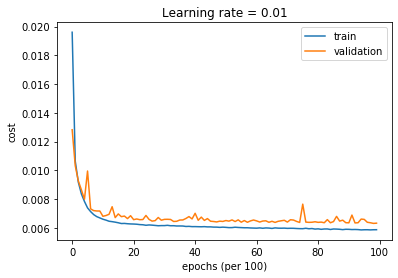

In [12]:
layers_dims = [4,10,10,1]
# layers_dims = [4,80,60,40,1]
# layers_dims = [4,1,30,20,1]
parameters = L_layer_model_minib(X_train, y_train,layers_dims,valid=True,valid_x=X_valid,valid_y=y_valid,num_iterations = 100,
                he_init=False, mini_batch_size = 1,learning_rate = 0.01, print_cost = True,regularisation='none',lambd=0.1,
                    optimizer="momentum", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,activation=activation,cost_func='mse')


In [13]:
pred_train = predictvals(X_train, parameters,activation=activation)
pred_denorm=denormalise(pred_train,activation,maxes[-1],mins[-1])
y_denorm=denormalise(y_train,activation,maxes[-1],mins[-1])
mapeval=mape_cost(y_denorm,pred_denorm)
print(mapeval)

pred_valid = predictvals(X_valid, parameters,activation=activation)
pred_denorm=denormalise(pred_valid,activation,maxes[-1],mins[-1])
y_denorm=denormalise(y_valid,activation,maxes[-1],mins[-1])
mapeval=mape_cost(y_denorm,pred_denorm)
print(mapeval)


pred_test = predictvals(X_test, parameters,activation=activation)
pred_denorm=denormalise(pred_test,activation,maxes[-1],mins[-1])
y_denorm=denormalise(y_test,activation,maxes[-1],mins[-1])
mapeval=mape_cost(y_denorm,pred_denorm)
print(mapeval)

0.6989828847241434
0.7057086615462096
0.700944865799523


In [14]:
print(pred_denorm)

[[482.94709363 432.87703598 474.58235714 465.32688057 452.06217032
  465.82752907 445.63319096 441.1764769  461.5613186  481.17257543
  446.41602513 471.9875509  453.26195499 435.51501448 472.69001893
  475.56774132 449.47219308 482.90587043 471.94185817 434.25682234
  479.43643055 443.95940448 466.61783515 439.59903743 466.60341453
  464.20004293 439.48030999 454.26726851 465.4046034  448.62624536
  456.41178122 462.95445513 434.81844366 440.64686947 450.92767399
  461.67259757 444.46725758 433.75768602 456.0183367  431.21413187
  430.80379779 484.6473164  436.77631338 444.79140224 439.96851524
  466.43778367 463.07930995 475.25476562 477.62528855 434.5701135
  474.7567407  440.29627652 442.50986831 440.59181581 442.41036304
  446.09927681 477.67666426 432.29436529 468.41198694 475.81455303
  442.52783306 453.82278257 435.38660847 475.83659079 433.78429467
  458.12184538 453.27255443 461.68456172 465.95650231 469.67145552
  463.8136399  437.5515931  439.86675891 436.72342323 464.03718

Cost after epoch 0: 0.352726  0.311554
Cost after epoch 1: 0.311706  0.269585
Cost after epoch 2: 0.271721  0.230708
Cost after epoch 3: 0.233722  0.195662
Cost after epoch 4: 0.198668  0.165099
Cost after epoch 5: 0.167193  0.139436
Cost after epoch 6: 0.140504  0.119562
Cost after epoch 7: 0.119460  0.105378
Cost after epoch 8: 0.104534  0.095962
Cost after epoch 9: 0.095001  0.089384
Cost after epoch 10: 0.088898  0.084004
Cost after epoch 11: 0.084047  0.078871
Cost after epoch 12: 0.079297  0.073453
Cost after epoch 13: 0.074236  0.067782
Cost after epoch 14: 0.068736  0.061976
Cost after epoch 15: 0.062859  0.056124
Cost after epoch 16: 0.056813  0.050442
Cost after epoch 17: 0.050837  0.045094
Cost after epoch 18: 0.045165  0.040228
Cost after epoch 19: 0.040015  0.035963
Cost after epoch 20: 0.035507  0.032365
Cost after epoch 21: 0.031756  0.029462
Cost after epoch 22: 0.028745  0.027219
Cost after epoch 23: 0.026431  0.025550
Cost after epoch 24: 0.024728  0.024356
Cost after

Cost after epoch 213: 0.007041  0.007818
Cost after epoch 214: 0.007031  0.007806
Cost after epoch 215: 0.007022  0.007795
Cost after epoch 216: 0.007012  0.007784
Cost after epoch 217: 0.007003  0.007773
Cost after epoch 218: 0.006993  0.007763
Cost after epoch 219: 0.006984  0.007752
Cost after epoch 220: 0.006975  0.007741
Cost after epoch 221: 0.006966  0.007731
Cost after epoch 222: 0.006956  0.007720
Cost after epoch 223: 0.006948  0.007710
Cost after epoch 224: 0.006939  0.007700
Cost after epoch 225: 0.006930  0.007689
Cost after epoch 226: 0.006922  0.007679
Cost after epoch 227: 0.006913  0.007669
Cost after epoch 228: 0.006905  0.007659
Cost after epoch 229: 0.006896  0.007649
Cost after epoch 230: 0.006888  0.007639
Cost after epoch 231: 0.006879  0.007628
Cost after epoch 232: 0.006871  0.007618
Cost after epoch 233: 0.006862  0.007608
Cost after epoch 234: 0.006854  0.007598
Cost after epoch 235: 0.006846  0.007589
Cost after epoch 236: 0.006837  0.007579
Cost after epoch

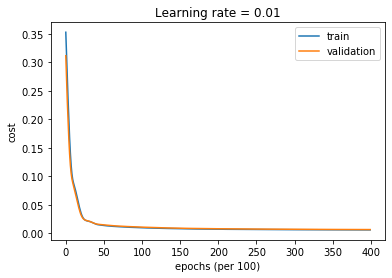

In [27]:
layers_dims = [4,10,10,1]
# layers_dims = [4,80,60,40,1]
# layers_dims = [4,1,30,20,1]
parameters = L_layer_model_minib(X_train, y_train,layers_dims,valid=True,valid_x=X_valid,valid_y=y_valid,num_iterations = 400,
                he_init=False, mini_batch_size =6888,learning_rate = 0.01, print_cost = True,regularisation='none',lambd=0.1,
                    optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,activation=activation,cost_func='mse')


In [28]:
pred_train = predictvals(X_train, parameters,activation=activation)
pred_denorm=denormalise(pred_train,activation,maxes[-1],mins[-1])
y_denorm=denormalise(y_train,activation,maxes[-1],mins[-1])
mapeval=mape_cost(y_denorm,pred_denorm)
print(mapeval)

pred_valid = predictvals(X_valid, parameters,activation=activation)
pred_denorm=denormalise(pred_valid,activation,maxes[-1],mins[-1])
y_denorm=denormalise(y_valid,activation,maxes[-1],mins[-1])
mapeval=mape_cost(y_denorm,pred_denorm)
print(mapeval)


pred_test = predictvals(X_test, parameters,activation=activation)
pred_denorm=denormalise(pred_test,activation,maxes[-1],mins[-1])
y_denorm=denormalise(y_test,activation,maxes[-1],mins[-1])
mapeval=mape_cost(y_denorm,pred_denorm)
print(mapeval)

0.7095788043658515
0.7166414150756857
0.7113998208854437


In [17]:
# reg="none"
# act=activation

# mape=predicterr(X_train,y_train,parameters,lambd=0.1,activation=act,regularisation=reg,cost_func="mape")
# print(mape)

# mape=predicterr(X_valid,y_valid,parameters,lambd=0.1,activation=act,regularisation=reg,cost_func="mape")
# print(mape)

# mape=predicterr(X_test,y_test,parameters,lambd=0.1,activation=act,regularisation=reg,cost_func="mape")
# print(mape)

In [18]:
# pred_train = predictvals(X_train, parameters,activation=activation)


In [19]:
# for i in range(0,10):
#     print(pred_train[0][i])
# print("y vals")
# for i in range(0,10):
#     print(y_train[0][i])
# print(pred_train.shape)
# print(X_train.shape)

In [29]:
# pred_test = predictvals(X_test, parameters,activation=activation)
# for i in range(0,10):
#     print(pred_test[0][i])
# print("y vals")
# for i in range(0,10):
#     print(y_test[0][i])
# print(pred_test.shape)
# print(X_test.shape)

In [21]:
# valid_err=predicterr(X_train,y_train,parameters,lambd=0.1,activation='sigmoid',regularisation='L2',cost_func='log')
valid_err=predicterr(X_train,y_train,parameters,lambd=0.1,activation=activation,regularisation='L2',cost_func="mse")

In [22]:
print(valid_err)

0.03632830234792926


In [23]:
# pred_test= predictvals(X_test, parameters,activation=activation)
# plt.scatter(X_test[0],pred_test,color='green')
# plt.show()
# plt.scatter(X_test[1],pred_test,color='red')
# plt.show()

# plt.scatter(X_test[2],pred_test,color='orange')
# plt.show()

# plt.scatter(X_test[3],pred_test)

In [24]:
# # pred_test= predictvals(X_test, parameters,activation='sigmoid')
# plt.scatter(y_test,X_test[0],color='green')
# plt.show()
# plt.scatter(X_test[1],y_test,color='red')
# plt.show()

# plt.scatter(X_test[2],y_test,color='orange')
# plt.show()

# plt.scatter(X_test[3],y_test)